<a href="https://colab.research.google.com/github/NazimKs/ETL_data_warehouse/blob/main/ETL_data_warhouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import decimal
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Read File and assign a variable to DataFrame.

import pandas as pd

csv_file = 'fifa21_raw_data.csv'

fifa_df = pd.read_csv(csv_file)

fifa_df


/tmp/ipykernel_91918/2654005665.py:7: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_df = pd.read_csv(csv_file)


,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,https://cdn.sofifa.com/players/257/710/21_60.png,Mengxuan Zhang,http://sofifa.com/player/257710/mengxuan-zhang...,China PR,CB,Zhang Mengxuan,21,47,52,\n\n\n\nChongqing Dangdai Lifan FC SWM Team\n2...,...,Low,Low,1 ★,58,23,26,27,50,48,2
18975,https://cdn.sofifa.com/players/258/736/21_60.png,Vani Da Silva,http://sofifa.com/player/258736/vani-da-silva/...,England,ST,V. Da Silva,17,47,67,\n\n\n\nOldham Athletic\n2020 ~ 2021\n\n,...,Medium,Medium,1 ★,70,46,40,53,16,40,3
18976,https://cdn.sofifa.com/players/247/223/21_60.png,Ao Xia,http://sofifa.com/player/247223/ao-xia/210005/,China PR,CB,Xia Ao,21,47,55,\n\n\n\nWuhan Zall\n2018 ~ 2022\n\n,...,Medium,Medium,1 ★,64,28,26,38,48,51,3
18977,https://cdn.sofifa.com/players/258/760/21_60.png,Ben Hough,http://sofifa.com/player/258760/ben-hough/210005/,England,CM,B. Hough,17,47,67,\n\n\n\nOldham Athletic\n2020 ~ 2021\n\n,...,Medium,Medium,1 ★,64,40,48,49,35,45,5


### Data Overview

In [41]:
fifa_df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [42]:
fifa_df.shape

(18979, 77)

In [43]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

### Transformations & Agregats

In [44]:
fifa_df = fifa_df.drop(["LongName","photoUrl","playerUrl"],axis=1)

#↓OVA does not comply with the column format so we will change it to OVA

fifa_df= fifa_df.rename(columns={"↓OVA":"OVA"})

In [45]:
print(fifa_df.dtypes[['Height','Weight']])
print(fifa_df[['Height', 'Weight']])

Height    object
Weight    object
dtype: object
      Height  Weight
0       5'7"  159lbs
1       6'2"  183lbs
2       6'2"  192lbs
3      5'11"  154lbs
4       5'9"  150lbs
...      ...     ...
18974  5'10"  154lbs
18975   5'7"  128lbs
18976  5'10"  146lbs
18977   5'9"  143lbs
18978   5'9"  150lbs

[18979 rows x 2 columns]


1. Convert height column values to cm

In [46]:


def convert_to_cm(height):
  feet, inches = height.split("'")
  feet = int(feet)
  inches = int(inches.replace('"', ''))
  total_inches = feet * 12 + inches
  return round(total_inches * 2.54,0)

fifa_df['Height'] = fifa_df['Height'].apply(convert_to_cm)

fifa_df['Height']


0        170.0
1        188.0
2        188.0
3        180.0
4        175.0
         ...  
18974    178.0
18975    170.0
18976    178.0
18977    175.0
18978    175.0
Name: Height, Length: 18979, dtype: float64

2. Convert Weight values from string(lbs) to float(kg)

In [47]:
def convert_to_kg(weight):
    lbs = int(weight[:-3])
    return round(lbs * 0.453592, 0)

fifa_df['Weight'] = fifa_df['Weight'].apply(convert_to_kg)

fifa_df['Weight']


0        72.0
1        83.0
2        87.0
3        70.0
4        68.0
         ... 
18974    70.0
18975    58.0
18976    66.0
18977    65.0
18978    68.0
Name: Weight, Length: 18979, dtype: float64

In [48]:
fifa_df["Joined"]

0         Jul 1, 2004
1        Jul 10, 2018
2        Jul 16, 2014
3        Aug 30, 2015
4         Aug 3, 2017
             ...     
18974     Aug 1, 2020
18975     Aug 1, 2020
18976    Jul 13, 2018
18977     Aug 1, 2020
18978     Jan 1, 2020
Name: Joined, Length: 18979, dtype: object

In [49]:
fifa_df['Joined'] = pd.to_datetime(fifa_df.Joined)
fifa_df["Joined"]

0       2004-07-01
1       2018-07-10
2       2014-07-16
3       2015-08-30
4       2017-08-03
           ...    
18974   2020-08-01
18975   2020-08-01
18976   2018-07-13
18977   2020-08-01
18978   2020-01-01
Name: Joined, Length: 18979, dtype: datetime64[ns]

In [50]:
def convert_money(x):
    if "€" in x:
        x=x.replace("€","")
    if "M" in x:
        x=x.replace("M","")
        x=float(x)*1000000
        return int(x)

    elif "K" in x:
        x=x.replace("K","")
        x=float(x)*1000
        return int(x)
    else:
        return int(x)
    

fifa_df["Value"]=fifa_df["Value"].apply(convert_money)
fifa_df["Wage"]= fifa_df["Wage"].apply(convert_money)
fifa_df["Release Clause"] = fifa_df["Release Clause"].apply(convert_money)

fifa_df[["Value","Wage","Release Clause"]]

,Value,Wage,Release Clause
0,67500000,560000,138400000
1,46000000,220000,75900000
2,75000000,125000,159400000
3,87000000,370000,161000000
4,90000000,270000,166500000
...,...,...,...
18974,35000,1000,57000
18975,60000,500,165000
18976,40000,1000,70000
18977,60000,500,165000


5. Some columns have 'star' characters. Strip those columns of these stars and make the columns numerical


In [51]:
# Find columns containing "*"
columns_with_star = [col for col in fifa_df.columns if '★' in fifa_df[col].values]

print("Columns containing '*':", columns_with_star)

Columns containing '*': []


/tmp/ipykernel_91918/471856537.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  columns_with_star = [col for col in fifa_df.columns if '★' in fifa_df[col].values]


In [52]:
fifa_df["W/F"]=fifa_df["W/F"].str.replace("★","")
fifa_df["SM"]=fifa_df["SM"].str.replace("★","")
fifa_df["IR"]=fifa_df["IR"].str.replace("★","")
fifa_df[["W/F","SM","IR"]]

,W/F,SM,IR
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5
...,...,...,...
18974,2,2,1
18975,2,2,1
18976,2,2,1
18977,2,2,1


In [53]:
fifa_df[["Team", "Contract"]] = fifa_df['Team & Contract'].str.lstrip('\n').str.rstrip('\n').str.split('\n').apply(lambda x: pd.Series([x[0], x[1]]))
fifa_df[["Team", "Contract"]]

,Team,Contract
0,FC Barcelona,2004 ~ 2021
1,Juventus,2018 ~ 2022
2,Atlético Madrid,2014 ~ 2023
3,Manchester City,2015 ~ 2023
4,Paris Saint-Germain,2017 ~ 2022
...,...,...
18974,Chongqing Dangdai Lifan FC SWM Team,2020 ~ 2020
18975,Oldham Athletic,2020 ~ 2021
18976,Wuhan Zall,2018 ~ 2022
18977,Oldham Athletic,2020 ~ 2021


In [54]:
fifa_df['Hits'] = fifa_df['Hits'].replace('\n',' ',regex=True)
fifa_df['Hits']

0         372
1         344
2          86
3         163
4         273
         ... 
18974       2
18975       3
18976       3
18977       5
18978       2
Name: Hits, Length: 18979, dtype: object

split positions

In [55]:
fifa_df[["Best Position", "2nd Position", "3rd Position"]] = fifa_df["Positions"].str.split(" ", expand=True)
fifa_df[["Best Position", "2nd Position", "3rd Position"]]

,Best Position,2nd Position,3rd Position
0,RW,ST,CF
1,ST,LW,None
2,GK,None,None
3,CAM,CM,None
4,LW,CAM,None
...,...,...,...
18974,CB,None,None
18975,ST,None,None
18976,CB,None,None
18977,CM,None,None


In [56]:


def contrat_type(x):
    if "Free" in x:
        return "Free"
    if "Loan" in x:
        return "Loan"
    if "~" in x:
        return "Contract"
    else:
        return pd.na
    

def start_time_contract(x):
    if "~" in x:
        return  int(x[:4])
    if "Loan" in x:
        x=x.strip(" On Loan")
        x= datetime.strptime(x, "%b %d, %Y")
        return x.date()
    else:
        return pd.NA

def end_time_contract(type,contract,loan):
    if type == "Contract":
        return int(contract[-4:])
    if type == "Loan":
        loan = datetime.strptime(loan, "%b %d, %Y")
        return loan.date()
    
    else:
        return pd.NA


fifa_df["Type of contract"] = fifa_df["Contract"].apply(contrat_type)
fifa_df["Start year"] = fifa_df["Contract"].apply(start_time_contract)
fifa_df["End year"] = fifa_df.apply(lambda row: end_time_contract(row["Type of contract"],row["Contract"],row["Loan Date End"] ), axis=1)


fifa_df[["Type of contract","Start year","End year"]]

,Type of contract,Start year,End year
0,Contract,2004,2021
1,Contract,2018,2022
2,Contract,2014,2023
3,Contract,2015,2023
4,Contract,2017,2022
...,...,...,...
18974,Contract,2020,2020
18975,Contract,2020,2021
18976,Contract,2018,2022
18977,Contract,2020,2021


In [57]:
fifa_df["Attacking"]=round((fifa_df['Crossing'] + fifa_df['Finishing'] + fifa_df['Heading Accuracy'] + fifa_df['Short Passing'] + fifa_df['Volleys'])/5,0)
fifa_df["Attacking"]=fifa_df["Attacking"].astype("int64")


fifa_df['Skill'] = round((fifa_df['Dribbling'] + fifa_df['Curve'] + fifa_df['FK Accuracy'] + fifa_df['Long Passing'] + fifa_df['Ball Control'])/5,0)
fifa_df["Skill"]=fifa_df["Skill"].astype("int64")

fifa_df['Movement'] = round((fifa_df['Acceleration'] + fifa_df['Sprint Speed'] + fifa_df['Agility'] + fifa_df['Reactions'] + fifa_df['Balance'])/5,0)
fifa_df["Movement"]=fifa_df["Movement"].astype("int64")

fifa_df['Power'] = round((fifa_df['Shot Power'] + fifa_df['Jumping'] + fifa_df['Stamina'] + fifa_df['Strength'] + fifa_df['Long Shots'])/5,0)
fifa_df["Power"]=fifa_df["Power"].astype("int64")

fifa_df['Mentality'] = round((fifa_df['Aggression'] + fifa_df['Interceptions'] + fifa_df['Positioning'] + fifa_df['Vision'] + fifa_df['Penalties'] + fifa_df['Composure'])/6,0)
fifa_df["Mentality"]=fifa_df["Mentality"].astype("int64")

fifa_df['Defending'] = round((fifa_df['Marking'] + fifa_df['Standing Tackle'] + fifa_df['Sliding Tackle'])/3,0)
fifa_df["Defending"]=fifa_df["Defending"].astype("int64")

fifa_df['Goalkeeping'] = round((fifa_df['GK Diving'] + fifa_df['GK Handling'] + fifa_df['GK Kicking'] + fifa_df['GK Positioning'] + fifa_df['GK Reflexes'])/5,0)
fifa_df['Goalkeeping']  = fifa_df["Goalkeeping"].astype("int64")

fifa_df = fifa_df.drop([ 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
    'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
    'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
    'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
    'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
    'Marking', 'Standing Tackle', 'Sliding Tackle',
    'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'],axis=1)

In [58]:
fifa_df

,Nationality,Positions,Name,Age,OVA,POT,Team & Contract,ID,Height,Weight,...,PHY,Hits,Team,Contract,Best Position,2nd Position,3rd Position,Type of contract,Start year,End year
0,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,158023,170.0,72.0,...,65,372,FC Barcelona,2004 ~ 2021,RW,ST,CF,Contract,2004,2021
1,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,20801,188.0,83.0,...,77,344,Juventus,2018 ~ 2022,ST,LW,None,Contract,2018,2022
2,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,200389,188.0,87.0,...,90,86,Atlético Madrid,2014 ~ 2023,GK,None,None,Contract,2014,2023
3,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,192985,180.0,70.0,...,78,163,Manchester City,2015 ~ 2023,CAM,CM,None,Contract,2015,2023
4,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,190871,175.0,68.0,...,59,273,Paris Saint-Germain,2017 ~ 2022,LW,CAM,None,Contract,2017,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,China PR,CB,Zhang Mengxuan,21,47,52,\n\n\n\nChongqing Dangdai Lifan FC SWM Team\n2...,257710,178.0,70.0,...,48,2,Chongqing Dangdai Lifan FC SWM Team,2020 ~ 2020,CB,None,None,Contract,2020,2020
18975,England,ST,V. Da Silva,17,47,67,\n\n\n\nOldham Athletic\n2020 ~ 2021\n\n,258736,170.0,58.0,...,40,3,Oldham Athletic,2020 ~ 2021,ST,None,None,Contract,2020,2021
18976,China PR,CB,Xia Ao,21,47,55,\n\n\n\nWuhan Zall\n2018 ~ 2022\n\n,247223,178.0,66.0,...,51,3,Wuhan Zall,2018 ~ 2022,CB,None,None,Contract,2018,2022
18977,England,CM,B. Hough,17,47,67,\n\n\n\nOldham Athletic\n2020 ~ 2021\n\n,258760,175.0,65.0,...,45,5,Oldham Athletic,2020 ~ 2021,CM,None,None,Contract,2020,2021


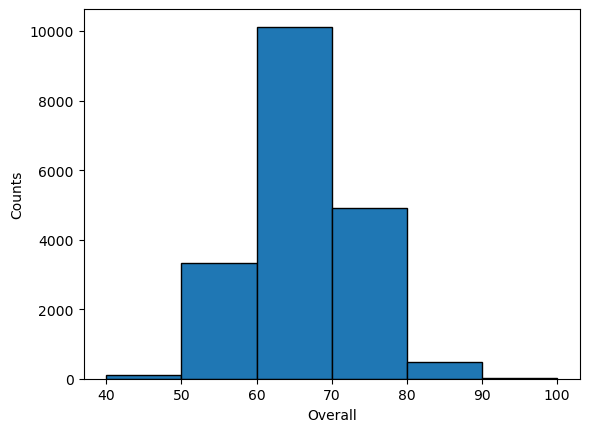

In [59]:
plt.hist(fifa_df["OVA"], bins=range(40, 100+10 , 10), edgecolor='k')
plt.ylabel("Counts")
plt.xlabel("Overall")
plt.show()

In [60]:
position_by_order = ["GK", "LWB", "LB", "CB", "RB", "RWB", "CDM", "LM", "CM", "RM", "CAM", "LW", "CF", "RW", "ST"]


position_colors = {"GK": "blue", "LB": "green", "CB": "green", "RB": "green","LWB": "green","RWB": "green","CDM": "green",
    "LM": "orange","CM": "orange","RM": "orange","CAM": "orange","LW": "red","CF": "red", "RW": "red", "ST": "red"
}
deffensive =["LB", "CB", "RB", "LWB", "RWB", "CDM"]
midfield =["LM", "CM", "RM", "CAM"]
offensive =["LW", "CF", "RW", "ST"]

[]

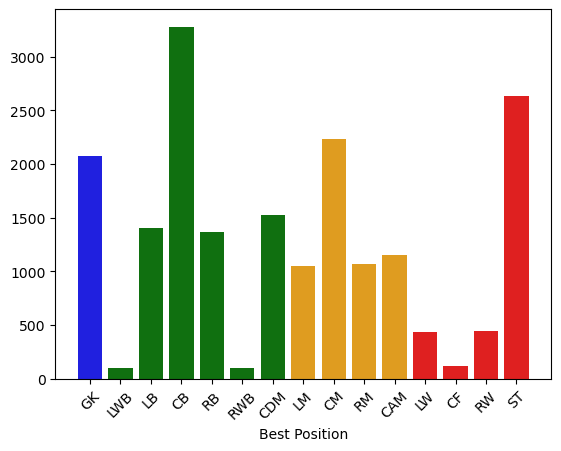

In [62]:
counts = fifa_df["Best Position"].value_counts()



values = counts.values
labels = counts.index
sns.set_palette([position_colors[pos] for pos in position_by_order])


plt.xticks(rotation=45)

sns.barplot(data=fifa_df,x=labels,y=values,order=position_by_order)
plt.plot()


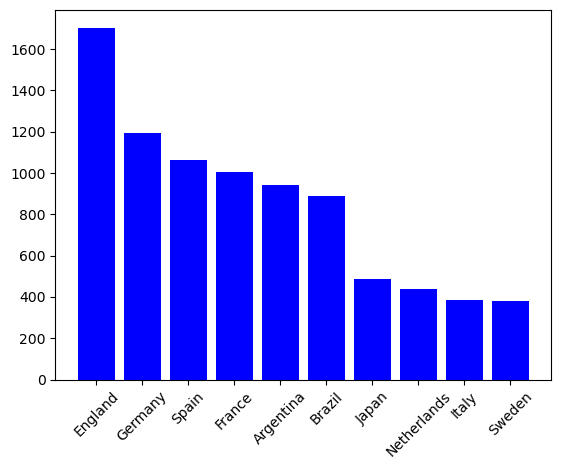

In [64]:
s=fifa_df.groupby("Nationality").size().reset_index(name="Count").sort_values(by="Count", ascending=False)
s=s[0:10]
plt.bar(s["Nationality"], s["Count"])
plt.xticks(rotation=45)
plt.show()